<a href="https://colab.research.google.com/github/p4arth/Cotton-Disease-Predictor/blob/main/CottonD_inceptionv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
# Transfer learning 
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [3]:
IMAGE_SIZE = [224,224]
train_path = '/content/drive/MyDrive/ds/train'
valid_path = '/content/drive/MyDrive/ds/val'

In [4]:
# +3 for three rgb channels
# include top = false for removing first and last layer
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights = 'imagenet', include_top=False)

87924736/87910968 [==============================] - 3s 0us/step


In [5]:
# keeping the weights same as in inception, not training the first and the last layers
for layers in inception.layers:
  layers.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/ds/train/')

In [6]:
# flattening so that we can add our own layers
x = Flatten()(inception.output)

In [7]:
prediction = Dense(4, activation = 'softmax')(x)

# inception model
model = Model(inputs=inception.input, outputs=prediction)

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1/255)

In [11]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/ds/train/', 
                                                 target_size = [224,224], batch_size = 32, class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [12]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/ds/val/',
                                            target_size = [224,224],
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 324 images belonging to 4 classes.


In [13]:
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=20,
    steps_per_epoch=len(training_set),
    validation_steps = len(test_set),
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 1323s 21s/step - loss: 2.2079 - accuracy: 0.7355 - val_loss: 0.7502 - val_accuracy: 0.8796
Epoch 2/20
61/61 [==============================] - 42s 688ms/step - loss: 0.8927 - accuracy: 0.8683 - val_loss: 0.5234 - val_accuracy: 0.9074
Epoch 3/20
61/61 [==============================] - 42s 695ms/step - loss: 0.5652 - accuracy: 0.9129 - val_loss: 0.5823 - val_accuracy: 0.8827
Epoch 4/20
61/61 [==============================] - 42s 684ms/step - loss: 0.6315 - accuracy: 0.9118 - val_loss: 0.5463 - val_accuracy: 0.9167
Epoch 5/20
61/61 [==============================] - 42s 682ms/step - loss: 0.6310 - accuracy: 0.9185 - val_loss: 0.7189 - val_accuracy: 0.9136
Epoch 6/20
61/61 [==============================] - 42s 694ms/step - loss: 0.4179 - accuracy: 0.9421 - val_loss: 0.6659 - val_accuracy: 0.9167
Epoch 7/20
61/61 [==============================] - 43s 699ms/step - loss: 0.5116 - accuracy: 0.9323 - val_loss: 0.5976 - val_accuracy: 0.9321

In [14]:
import matplotlib.pyplot as plt

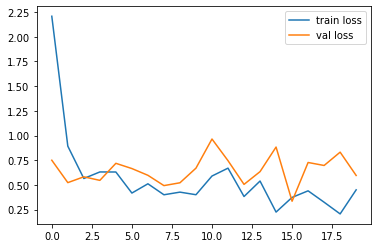

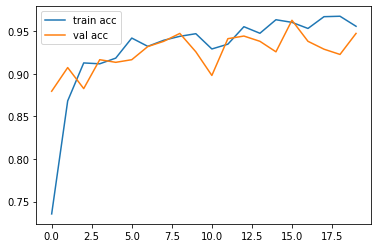

<Figure size 432x288 with 0 Axes>

In [15]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
from tensorflow.keras.models import load_model
model.save('model_inceptionv3.h5')